<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" width="800">

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:**

**Забавный факт о себе:**

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 13.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [ ]:
df_ria = pd.read_csv('/kaggle/input/iad-homework4/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [ ]:
df_vk = pd.read_csv('/kaggle/input/iad-homework4/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [ ]:
df_comments = pd.read_csv('/kaggle/input/iad-homework4/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

/tmp/ipykernel_23/171744076.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/kaggle/input/iad-homework4/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [ ]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [ ]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [ ]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [ ]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [ ]:
df_ria.target_tags.values[:3]

array([list([186, 1395, 608]), list([1324, 559, 608]), list([852])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [ ]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [ ]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [ ]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [ ]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [ ]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [ ]:
# your code here
# ヽ(♡‿♡)ノ

df_vk['title_clean'] = df_vk.title.apply(normalise_text)

df_ria['snippet_clean'] = df_ria.snippet.apply(lambda x: normalise_text(x) if pd.notnull(x) else "#UNK#")

df_vk['snippet_clean'] = df_vk.snippet.apply(lambda x: normalise_text(x) if pd.notnull(x) else "#UNK#")

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [ ]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [ ]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [ ]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [ ]:
# your code here
# ♡ (´｡• ω •｡`)

df_test = df[(df['date'] >= '2018-12-01')]
df_val = df[(df['date'] >= '2018-10-01') & (df['date'] <= '2018-11-30')]
df_train = df[(df['date'] < '2018-10-01')]

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [ ]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[614]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[308, 608]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1032, 1032, 190, 119, 196]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[614]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[308, 608]"


Напишем датасет для поставки данных в нейросеть.


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        return (self.X_title[idx, :], self.y[idx])


__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with youfrom torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDatasetWithSnippet(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)

       if snippet is not None and max_snippet_len is not None:
            self.X_snippet = self.create_text(snippet, max_snippet_len)
       else:
            self.X_snippet = None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]
        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet is not None:
            return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])
        else:
            return (self.X_title[idx, :], self.y[idx])
# Внесите в код датасета выше свои правки

Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=3)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=3)

In [ ]:
len(idx2tag)

1583

## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [ ]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [ ]:
!pip3 install pytorch_lightning

In [ ]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

Обучим модель.

In [ ]:
from pytorch_lightning.loggers import WandbLogger

import wandb



wandb.login()


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project='dz4_ogo')
wandb_logger = WandbLogger(log_model='all')

wandb: Currently logged in as: kairwin2004 (kairwin2004-hse). Use `wandb login --relogin` to force relogin


In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module =TrainLightningModule(model_baseline, LR, criterion)

trainer = pl.Trainer(logger = wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module, train_dataloader, val_dataloader)


/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆███████
train_loss,█▆▅▅▅▃▅▄▄▃▃▃▄▂▃▂▃▃▃▃▃▃▃▂▃▂▁▂▂▂▂▂▂▂▂▂▂▂▂▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇██
val_loss,█▄▂▁▁
epoch,4
train_loss,8.74167
trainer/global_step,10694
val_loss,10.72803


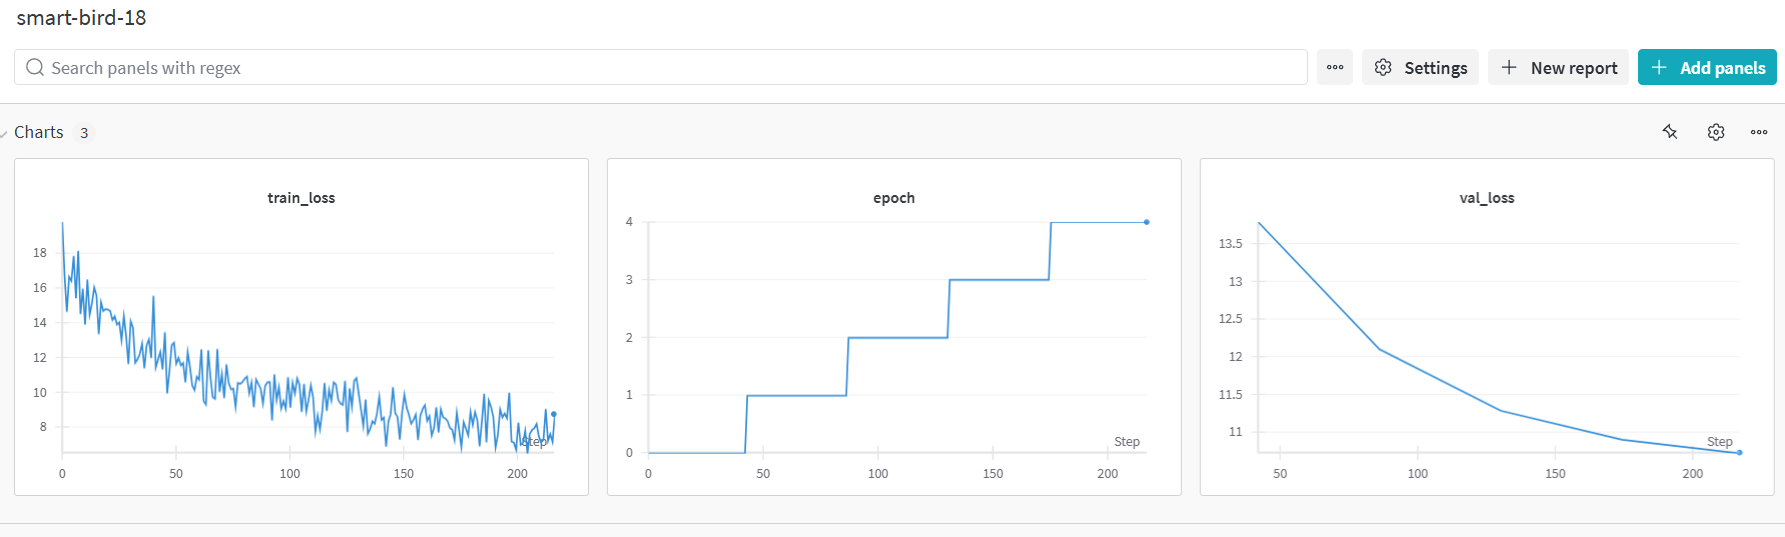

__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [ ]:
# your code here
# (￢_￢)
# Сначала создадим модельку со снипетом

class SimpleClassifierSnippet(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim*2, output_dim) # так как у нас 2 эмбединга будет считай

    def forward(self, title, snippet):

        embedded_tit = self.embedding(title)
        embedded_tit = embedded_tit.mean(dim=1)

        embedded_snip = self.embedding(title)
        embedded_snip = embedded_snip.mean(dim=1)

        embedded = torch.cat((embedded_tit, embedded_snip), dim=1)
        return self.fc(embedded)

In [ ]:


class TrainLightningModuleSnippet(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title,snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

In [ ]:
train_dataset_snippet = NewsDatasetWithSnippet(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, 90)
val_dataset_snippet = NewsDatasetWithSnippet(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, 90)
test_dataset_snippet = NewsDatasetWithSnippet(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, 90)



In [ ]:
train_dataloader_snippet = DataLoader(train_dataset_snippet, shuffle=True, batch_size=64, num_workers=3)
val_dataloader_snippet = DataLoader(val_dataset_snippet, shuffle=False, batch_size=4096, num_workers=3)

In [ ]:
wandb.init(project='dz4_ogo')
wandb_logger = WandbLogger(log_model='all')
model_snip = SimpleClassifierSnippet(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)


train_module_snippet = TrainLightningModuleSnippet(model_snip, LR, criterion)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module_snippet, train_dataloader_snippet, val_dataloader_snippet)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆█
train_loss,█▇█▇▅▅▅▅▄▃▄▂▃▂▂▃▃▃▃▃▂▁▂▂▃▁▂▂▂▂▂▂▂▂▂▁▁▂▁▂
trainer/global_step,▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
val_loss,█▃▂▁▁
epoch,4
train_loss,7.5442
trainer/global_step,10694
val_loss,10.65243


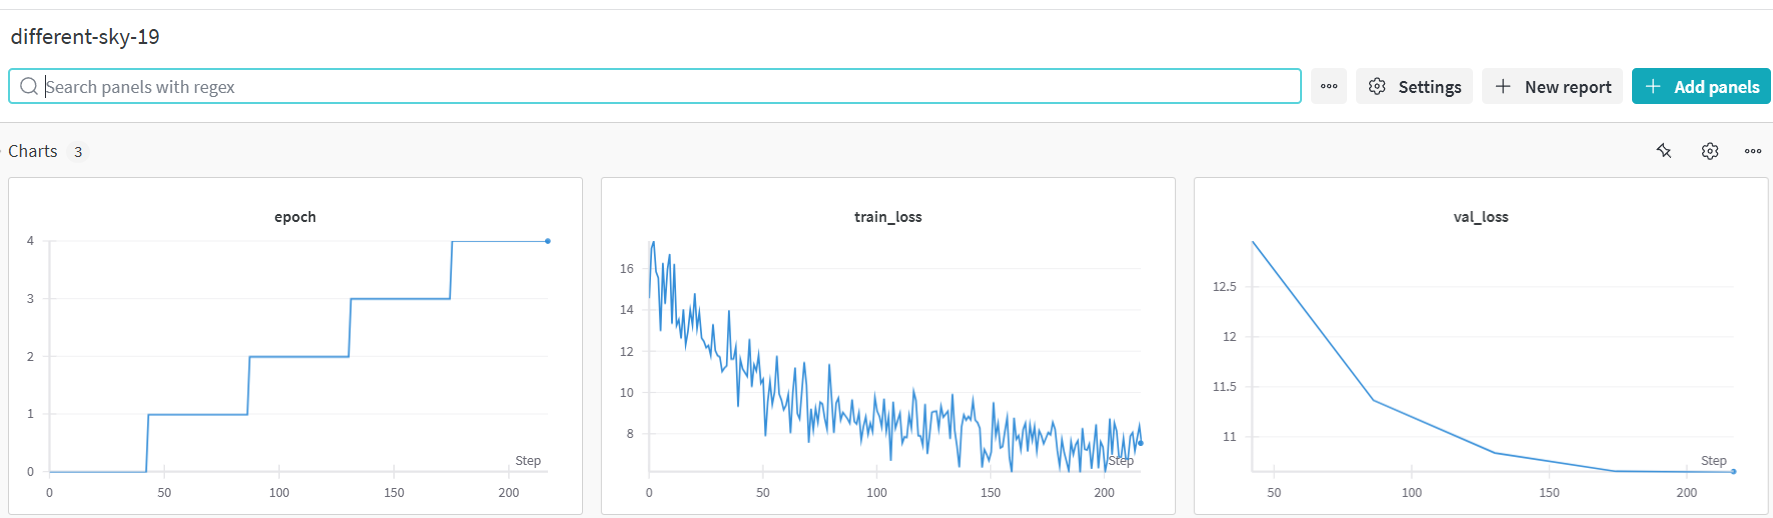

Можем заметить, что качество на валидационной выборке практически не изменилось с добавлением снипета.

## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [ ]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.995577871799469
Precision: 0.2929286062717438
Recall: 0.7618454694747925


In [ ]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.998325526714325
Precision: 0.5182316899299622
Recall: 0.6146035194396973


In [ ]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983180165290833
Precision: 0.005699784029275179
Recall: 0.005216543562710285


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [ ]:
def get_predict(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__

На мой взгляд, для данной задачи больше важна метрика precision, так как для нас ложные срабатывания более критичны, чем упущение некоторых положительных случаев, мы хотим точно предсказывать категории, пусть даже мы что-то упустим.

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [ ]:
# your code here
# (＠_＠)

def best_threshold(y_true, y_pred_prob, metric):

    best_threshold = None
    best_metric = 0.0

    thresholds = np.arange(0, 1, 0.01)
 # Тестируем пороги от 0 до 1 с шагом 0.01
    for threshold in thresholds:
        y_pred = 1* (y_pred_prob > threshold)
        metric_value = metric(y_true, y_pred)
        if metric_value > best_metric:
            best_metric = metric_value
            best_threshold = threshold

    return best_threshold, best_metric


In [ ]:
# Сначала найдем для модели без снипетта
val_pred_prob, val_target = get_predict(train_module, val_dataset)
best_threshold1, best_metric_value = best_threshold(val_target, val_pred_prob, precision)
print(f'Best Threshold: {best_threshold1}')


Best Threshold: 0.14


In [ ]:
TRESHOLD = best_threshold1
y_pred = 1*(pred_prob > TRESHOLD)

print('Precision on test:', precision(target, y_pred))

Precision on test: 0.578829288482666


Далее сделаем для модели со снипетом

In [ ]:

def get_predict_snippet(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, snippet, target in dataloader:  # Добавляем 'snippet'
        logit = model(title, snippet)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target


In [ ]:
pred_prob_snippet, target_snippet = get_predict_snippet(train_module_snippet, test_dataset_snippet)

test_target_snippet = target_snippet
test_pred_prob_snippet = pred_prob_snippet

val_pred_prob_snippet, val_target_snippet = get_predict_snippet(train_module_snippet, val_dataset_snippet)

In [ ]:
best_threshold_snippet, best_metric_value_snippet = best_threshold(val_target_snippet,val_pred_prob_snippet, precision)
print(f'Best Threshold With Snippet: {best_threshold_snippet}')


Best Threshold With Snippet: 0.14


In [ ]:
TRESHOLD = best_threshold_snippet
y_pred_snippet = 1*(test_pred_prob_snippet > TRESHOLD)

print('Precision on test:', precision(test_target_snippet, y_pred_snippet))

Precision on test: 0.5875112414360046


Как мы можем заметить, что метрика модели со снипетом немного лучше оказалось, это можно объяснить тем, что мы как никак добавляем немного информации в наше обучение при добавлении снипета

__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [ ]:
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[614]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[308, 608]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1032, 1032, 190, 119, 196]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[614]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[308, 608]"


In [ ]:
# your code here
# (❍ᴥ❍ʋ)
df_oob_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM)

pred_prob_oob, target_oob = get_predict(train_module, df_oob_dataset)

In [ ]:
TRESHOLD = best_threshold1
y_pred = 1*(pred_prob_oob > TRESHOLD)

print('Precision:', precision(target_oob, y_pred))

Precision: 0.5403023958206177


Как мы можем заметить, качество ухудшилось несильно

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# попробуем улучшить нашу модельку
class SimpleClassifierSnippetImproved(nn.Module):
   def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 256, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(256, 128, kernel_size=3, padding=1)
        self.pool = nn.AdaptiveMaxPool1d(10)  # Ограничиваем до фиксированного размера
        self.fc = nn.Linear(128 * 10 * 2, output_dim)  # Учитываем конкатенацию двух входов

   def forward(self, title, snippet):
        # Эмбеддинги для заголовков и сниппетов
        embedded_title = self.embedding(title).permute(0, 2, 1)  # Для Conv1d
        embedded_snippet = self.embedding(snippet).permute(0, 2, 1)

        # Свертка + пуллинг для заголовков
        conv_title = F.relu(self.conv1(embedded_title))
        conv_title = self.pool(F.relu(self.conv2(conv_title)))
        conv_title = conv_title.view(conv_title.size(0), -1)  # Flatten

        # Свертка + пуллинг для сниппетов
        conv_snippet = F.relu(self.conv1(embedded_snippet))
        conv_snippet = self.pool(F.relu(self.conv2(conv_snippet)))
        conv_snippet = conv_snippet.view(conv_snippet.size(0), -1)  # Flatten

        # Конкатенация
        combined = torch.cat((conv_title, conv_snippet), dim=1)

        # Полносвязный слой
        return self.fc(combined)

In [ ]:
wandb.init(project='dz4_ogo')
wandb_logger = WandbLogger(log_model='all')

EMBEDDING_DIM = 300
EPOCHS = 5
LR = 0.001
model_snip_imp = SimpleClassifierSnippetImproved(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)


train_module_snippet = TrainLightningModuleSnippet(model_snip_imp, LR, criterion)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module_snippet, train_dataloader_snippet, val_dataloader_snippet)


/opt/conda/lib/python3.10/site-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆███████
train_loss,█▅▅▃▄▄▃▃▄▃▂▂▃▂▃▁▁▂▂▂▃▂▂▂▂▂▃▂▂▁▂▂▂▂▂▂▁▂▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
val_loss,▃▁▃▅█
epoch,4
train_loss,6.10673
trainer/global_step,10694
val_loss,13.57126


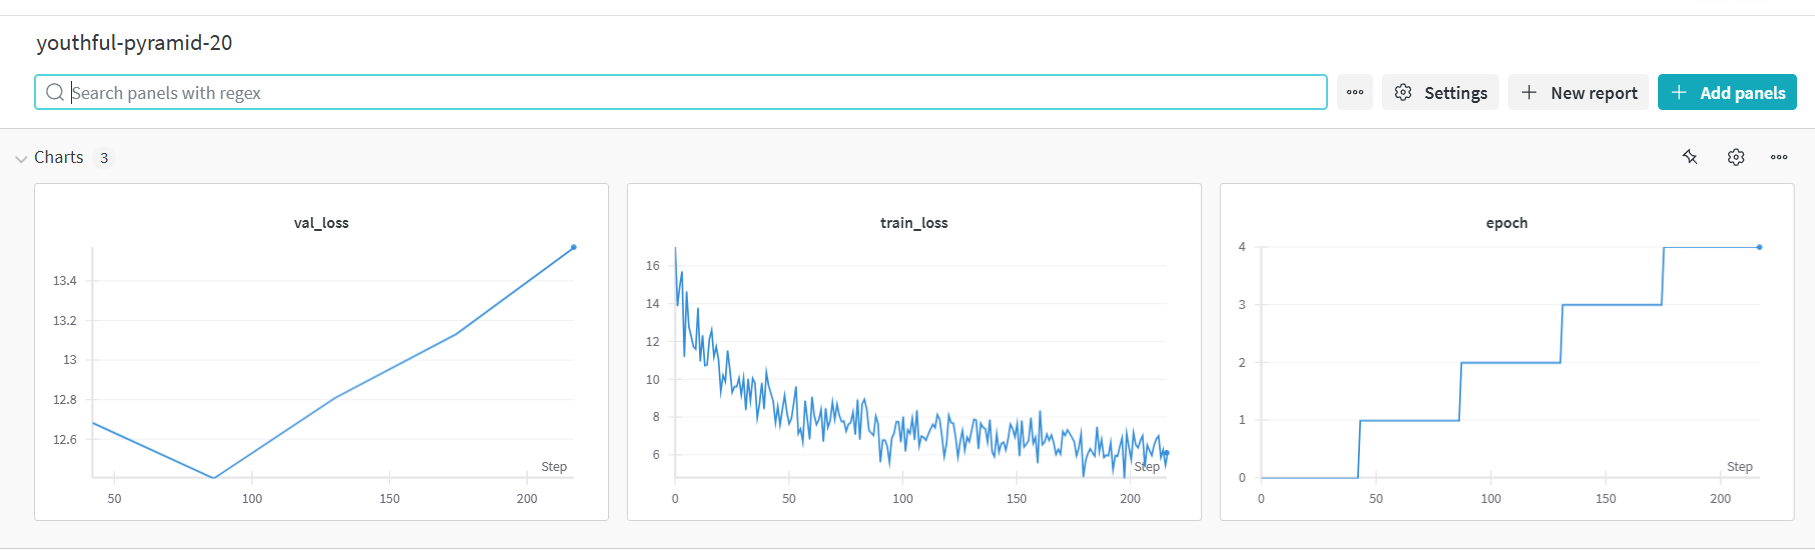

Усложнение архитектуры модели, даже при разных learning rate дало только ухудшение, val_loss не оказывался меньше 13 во всех опытах, поэтому дальше будем работать с простой моделью со снипетом, меняя при этом оптимайзер и lr

In [ ]:
# your code here
# (⊙_⊙)
#
class SimpleClassifierSnippet(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim*2, output_dim) # так как у нас 2 эмбединга будет считай

    def forward(self, title, snippet):

        embedded_tit = self.embedding(title)
        embedded_tit = embedded_tit.mean(dim=1)

        embedded_snip = self.embedding(title)
        embedded_snip = embedded_snip.mean(dim=1)

        embedded = torch.cat((embedded_tit, embedded_snip), dim=1)
        return self.fc(embedded)


class TrainLightningModuleSnippet(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        result = self.model(title,snippet)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)

        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)  # T_max = количество эпох

        return {"optimizer": optimizer, "lr_scheduler": scheduler}



    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss


In [ ]:
wandb.init(project='research')
wandb_logger = WandbLogger(log_model='all')

EMBEDDING_DIM = 300
EPOCHS = 3
LR = 0.002
model_snip = SimpleClassifierSnippet(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)


train_module_snippet = TrainLightningModuleSnippet(model_snip, LR, criterion)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module_snippet, train_dataloader_snippet, val_dataloader_snippet)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅████████████████
train_loss,█▆▆▄▅▅▄▅▄▄▄▄▃▂▂▄▂▂▂▂▃▂▃▂▃▁▃▃▂▃▁▂▁▂▁▂▂▂▃▂
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█
val_loss,█▂▁
epoch,2
train_loss,8.63882
trainer/global_step,6416
val_loss,10.3896


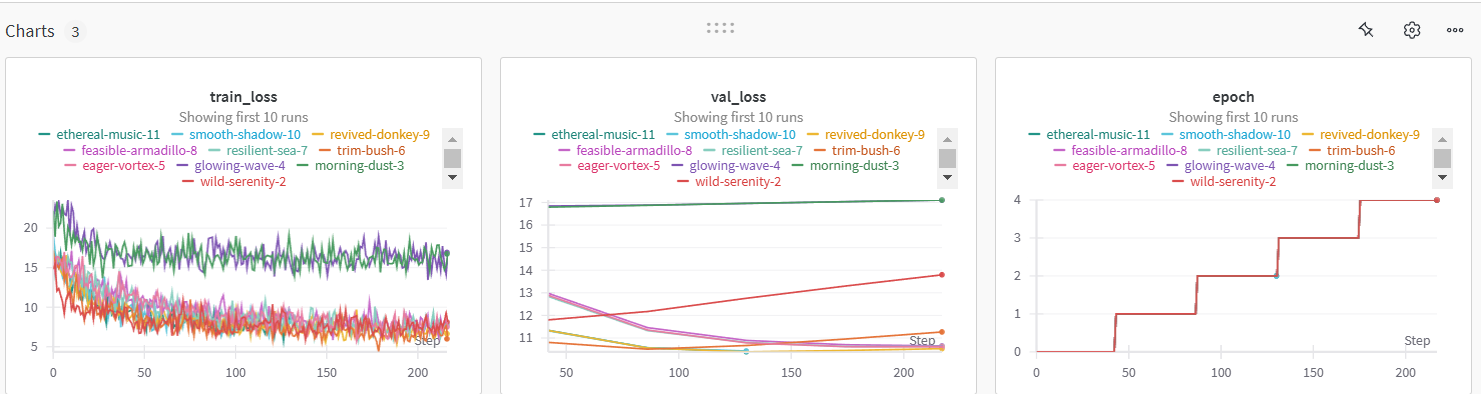

Как мы можем заметить, измение lr и добавление cosine scheduler, который борется с переобучением помогло нам добиться уменьшения ошибки на валидционной выборке в 0.2

__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# =^･ｪ･^=
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2024-12-11 19:31:33--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: 'navec_hudlit_v1_12B_500K_300d_100q.tar'

navec_hudlit_v1_12B 100%[===================>]  50.56M  16.0MB/s    in 3.3s    

2024-12-11 19:31:37 (15.2 MB/s) - 'navec_hudlit_v1_12B_500K_300d_100q.tar' saved [53012480/53012480]



In [ ]:
!ls

lightning_logs	navec_hudlit_v1_12B_500K_300d_100q.tar	wandb


In [ ]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

Обработаем ембединги

In [ ]:



unk_index = vocabulary.get("#UNK#")

# Создаем матрицу эмбеддингов
embedding_dim = 300  # Размерность эмбеддингов
vocab_size = len(vocabulary)
pretrained_embeddings = np.random.rand(vocab_size, embedding_dim)

# Заполняем матрицу эмбеддингов
for idx, word in enumerate(vocabulary):
    if word in navec:
        pretrained_embeddings[idx] = navec[word]
    else:
        pretrained_embeddings[idx] = pretrained_embeddings[unk_index]

# Преобразуем в тензор и загружаем в слой nn.Embedding
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
embedding_layer.weight.data.copy_(torch.tensor(pretrained_embeddings))

# Замораживаем веса эмбеддингов
embedding_layer.weight.requires_grad = False


In [ ]:
class SimpleClassifierPretrained(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = embedding_layer
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

In [ ]:
wandb.init(project='rusvectors')
wandb_logger = WandbLogger(log_model='all')

EMBEDDING_DIM = 300
EPOCHS = 5
LR = 0.001
model_pretrained = SimpleClassifierPretrained(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)


train_module_pretrained = TrainLightningModule(model_pretrained, LR, criterion)

trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=EPOCHS)
trainer.fit(train_module_pretrained, train_dataloader, val_dataloader)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆█████████
train_loss,▅▄█▇▄▃▆▄▄▅▃▂▄▅▁▂▃▃▂▄▄▄▃▂▃▁▃▂▄▃▃▁▃▃▂▂▁▃▂▅
trainer/global_step,▁▁▂▂▂▂▂▂▂▂▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
val_loss,█▅▃▂▁
epoch,4
train_loss,13.9946
trainer/global_step,10694
val_loss,15.29795


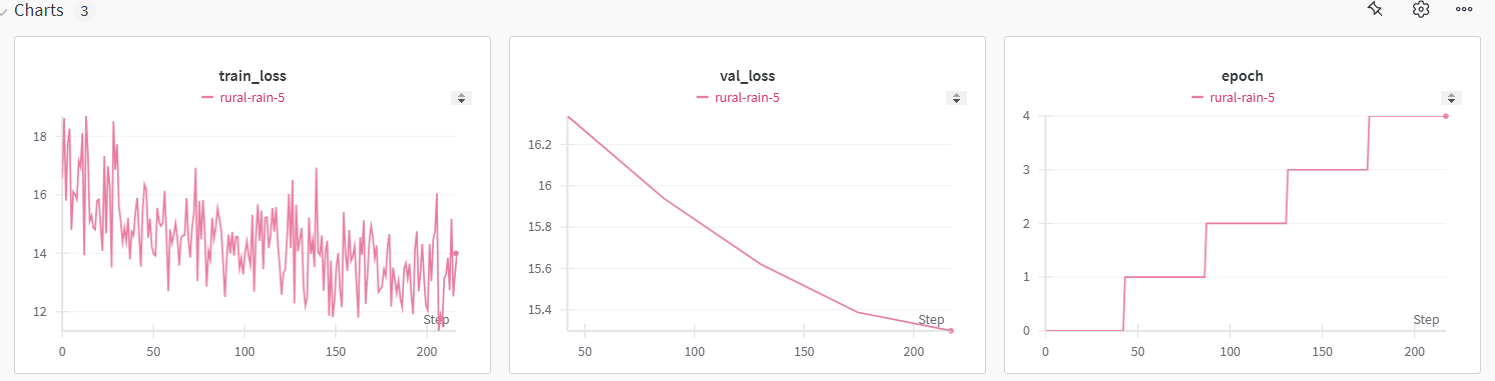

Как можем заметить, лучше модель не стала

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# ٩(ˊ〇ˋ*)و
!pip3 install transformers



In [ ]:
class NewsDataset1(Dataset):
    def __init__(self, titles, snippets, targets):
        self.titles = titles
        self.snippets = snippets
        self.targets = targets

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        title = self.titles[idx]
        snippet = self.snippets[idx]
        target = self.targets[idx]
        return title, snippet, target


Сравните все обученные модели между собой на тестовой выборке.

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

class ClassifierTrans(nn.Module):
    def __init__(self, pretrained_model_name, output_dim):
        super().__init__()
        self.tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
        self.model = AutoModel.from_pretrained(pretrained_model_name)
        self.fc = nn.Linear(self.model.config.hidden_size * 2, output_dim)

    def forward(self, input_ids_title, attention_mask_title, input_ids_snippet, attention_mask_snippet):

        title_output = self.model(input_ids=input_ids_title, attention_mask=attention_mask_title)
        snippet_output = self.model(input_ids=input_ids_snippet, attention_mask=attention_mask_snippet)


        title_cls = title_output.last_hidden_state[:, 0, :]
        snippet_cls = snippet_output.last_hidden_state[:, 0, :]


        combined = torch.cat((title_cls, snippet_cls), dim=1)


        logits = self.fc(combined)
        return logits



In [ ]:
class TrainLightningModuleTrans(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, encoded_titles, encoded_snippets):
        return self.model(
            input_ids_title=encoded_titles["input_ids"],
            attention_mask_title=encoded_titles["attention_mask"],
            input_ids_snippet=encoded_snippets["input_ids"],
            attention_mask_snippet=encoded_snippets["attention_mask"],
        )

    def training_step(self, train_batch, batch_idx):
        encoded_titles, encoded_snippets, targets = train_batch
        logits = self.forward(encoded_titles, encoded_snippets)
        loss = self.criterion(logits, targets)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.forward(title, snippet)
        loss = self.criterion(logits, target)
        self.log("val_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        return optimizer



In [ ]:
def collate_fn(batch):
    try:
        titles, snippets, targets = zip(*batch)


        tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        encoded_titles = tokenizer(
            list(titles), padding=True, truncation=True, max_length=20, return_tensors="pt"
        )
        encoded_snippets = tokenizer(
            list(snippets), padding=True, truncation=True, max_length=40, return_tensors="pt"
        )

        # Преобразуем таргеты в one-hot encoding
        targets_tensor = torch.zeros(len(targets), CLASSES_NUM, dtype=torch.float)
        for i, target in enumerate(targets):
            for t in target:
                targets_tensor[i, t] = 1.0

        return encoded_titles, encoded_snippets, targets_tensor
    except Exception as e:

        raise e

In [ ]:
train_dataset_encoded = NewsDataset1(df_train.title_clean.values, df_train.snippet_clean.values, df_train.target_tags.values)
val_dataset_encoded = NewsDataset1(df_val.title_clean.values, df_val.snippet_clean.values, df_val.target_tags.values)

train_dataloader_encoded = DataLoader(train_dataset_encoded, shuffle=True, batch_size=32, num_workers=4, collate_fn=collate_fn)
val_dataloader_encoded = DataLoader(val_dataset_encoded, shuffle=False, batch_size=200, num_workers=4, collate_fn=collate_fn)


In [ ]:

# Инициализация wandb
wandb.init(project='transformer')
wandb_logger = WandbLogger(log_model='all')


# Параметры
EPOCHS = 2
MODEL_NAME = "distilbert-base-uncased"
CLASSES_NUM = len(idx2tag)
LR = 0.001

# Инициализация модели и модуля тренировки
model_trans = ClassifierTrans(MODEL_NAME, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_trans = TrainLightningModuleTrans(model_trans, LR, criterion)

# Запуск тренировки
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_trans, train_dataloader_encoded, val_dataloader_encoded)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██████████████████████
train_loss,█▆▂▅▃▃▂▃▄▃▅▄▇▆▂▄▄▄▄▂▄▁▃▆▃▃▃▂▃▆▃▃▁▄▆▇▃▆▅▃
trainer/global_step,▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇████
val_loss,▁█
epoch,1
train_loss,16.79463
trainer/global_step,8555
val_loss,17.6414


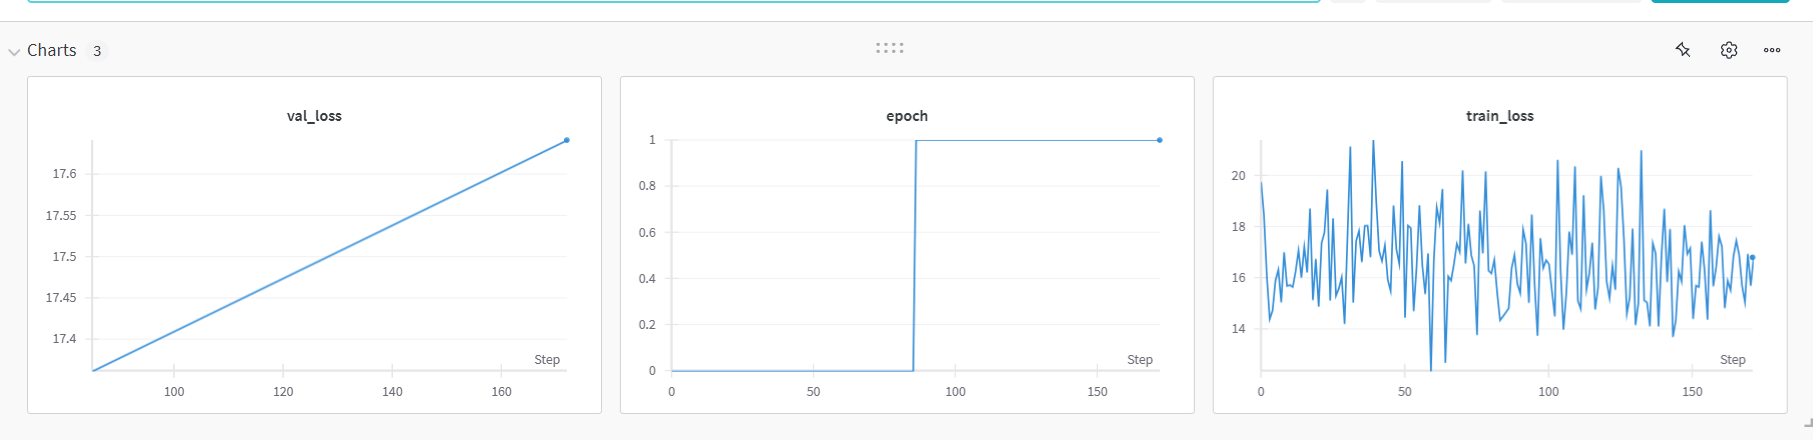

Так как 1 эпоха обучается почти 20 минут, то много поставить я не могу, нет времени(

In [ ]:
a, b = get_predict(train_module, test_dataset)
c, d =  get_predict_snippet(train_module_snippet, test_dataset_snippet)


threshold = 0.13

y_pred = 1*(a > threshold)
y_pred_snip = 1*(c > threshold)


print('Exact Match:', exact_match(b, y_pred))
print('Precision:', precision(b, y_pred))
print('Recall:', recall(b, y_pred))

print('Exact Match with snippet:', exact_match(d, y_pred_snip))
print('Precision with snippet:', precision(d, y_pred_snip))
print('Recall with snippet:', recall(d, y_pred_snip))



Exact Match: 0.9985973238945007
Precision: 0.5789962410926819
Recall: 0.4507254958152771
Exact Match with snippet: 0.9986037611961365
Precision with snippet: 0.5874989628791809
Recall with snippet: 0.4669315814971924


Лучше всего себя проявила обычная модель со снипетом, дальше будем использовать ее

## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

У нас лучшая модель со снипетом и поэтому будем предсказывать по ней

In [ ]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]



df_vk_dataset = NewsDatasetWithSnippet(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_vk.snippet_clean.values, 90)

pred_prob_vk, target_vk = get_predict_snippet(train_module_snippet, df_vk_dataset)

preds = []


y_pred_vk = 1*(pred_prob_vk > 0.14)

for pred in y_pred_vk:
    pred_ind = np.where(pred == 1)[0]
    preds.append([list(target_tags)[i] for i in pred_ind])

print(preds[:10])

# your code here
# (っ˘ڡ˘ς)

[['ситуация в днр и лнр', 'в мире', 'донецкая народная республика'], ['происшествия'], ['черное море'], ['россия', 'сша'], ['украина', 'в мире'], ['происшествия'], ['общество', 'московская область'], ['в мире'], ['россия', 'общество'], ['хоккей с мячом']]


На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [ ]:

df_vk_preds = pd.DataFrame(preds)
df_vk_preds


,0,1,2,3,4
0,ситуация в днр и лнр,в мире,донецкая народная республика,None,None
1,происшествия,None,None,None,None
2,черное море,None,None,None,None
3,россия,сша,None,None,None
4,украина,в мире,None,None,None
...,...,...,...,...,...
19923,россия,политика,None,None,None
19924,россия,политика,None,None,None
19925,открытия - риа наука,риа наука,None,None,None
19926,в мире,сша,None,None,None


## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [ ]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели? Sergey Smetanin
2. Как выглядит архитектура модели? Насколько модель большая? Количество параметров: 29.2 миллиона параметров.  Это доработанная версия rubert-tiny: словарь модели расширен c 30К до 80К токенов, увеличина максимальную длину текста с 512 до 2048 токенов.
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?. Обучена модель на комбинации задач masked language modelling, natural language inference, и аппроксимации эмбеддингов LaBSE, также на различных датасетах, поэтому можно заявить, что данная модель подходит для нашей задачи.

Установим библиотеку. 🤗🤗🤗

In [ ]:
!pip3 install transformers

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [ ]:
# your code here
# ʕ•ᴥ•ʔ
from transformers import pipeline

texts = df_comments['text'].head(10).tolist()
model = pipeline(model="seara/rubert-tiny2-russian-sentiment", device=device)

result = model(texts)
for comment, result in zip(texts, result):
    print(f"Комментарий: {comment}")
    print(f"Результат: {result}\n")

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Комментарий: ЧВК Вагнера?
Результат: {'label': 'neutral', 'score': 0.9122462868690491}

Комментарий: [id4710641|Евгений], выздоравливай.
Результат: {'label': 'neutral', 'score': 0.8793703317642212}

Комментарий: [id442655034|Андрей], искренне желаю этого всей фабрике.
Результат: {'label': 'positive', 'score': 0.6762611865997314}

Комментарий: Опять про Украину новости?
Результат: {'label': 'neutral', 'score': 0.9259392023086548}

Комментарий: Че такое ДНР?
Результат: {'label': 'neutral', 'score': 0.866222620010376}

Комментарий: [id109937745|Илья], Донецкая Народная Республика !!!!
Результат: {'label': 'neutral', 'score': 0.8428510427474976}

Комментарий: [id89551382|Юрий], это где?
Результат: {'label': 'neutral', 'score': 0.924575924873352}

Комментарий: [id109937745|Илья], Донецкая Народная Республика.
Результат: {'label': 'neutral', 'score': 0.9119594693183899}

Комментарий: [id483059794|Марк], Донецк российский отделился что ли в Ростовской области?
Результат: {'label': 'neutral', 

Мы применили модель к нашим данным на примере 10 результатов и получили неплохоие результаты, далее воспользуемся готовым проскоренным датасетом, который скинул один студент

In [ ]:
res = pd.read_csv('/kaggle/input/commens/df_comments.csv')
res.head(5)

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223


Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [ ]:

print(f'Доля негативных комментариев = {res[res["sentiment_verdict"] == "negative"].shape[0] / res.shape[0]}')

print(f'Доля позитивных комментариев = {res[res["sentiment_verdict"] == "positive"].shape[0] / res.shape[0]}')

# your code here
# ʕ•ᴥ•ʔ

Доля негативных комментариев = 0.22879865453533585
Доля позитивных комментариев = 0.07200180354730809


In [ ]:
top_positive = res[res['sentiment_verdict'] == 'positive'].nlargest(10, 'sentiment_score')


In [ ]:
top_positive

,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
493792,23095070.0,23094261.0,2018-11-17 11:21:56,"Отлично, молодец!Поздравляю!✨💫🌟💥",0.0,positive,0.996725
1379447,21323499.0,21322970.0,2018-06-20 18:54:40,Отлично! Просто отлично! Молодцы! Поздравляю о...,3.0,positive,0.996674
2352264,18718201.0,18718179.0,2017-11-30 13:22:42,"отлично,молодцы!!!👍 респект",3.0,positive,0.996605
2057938,19643844.0,19640879.0,2018-02-16 08:33:19,Отлично! \nПоздравляем!!!,1.0,positive,0.996536
2074701,19591344.0,19588477.0,2018-02-12 08:25:08,"Отлично,я рад.",0.0,positive,0.996462
236794,23585686.0,23584622.0,2018-12-29 11:48:39,"Отлично,молодцы",2.0,positive,0.996461
1300899,21515168.0,21514312.0,2018-07-06 15:22:04,"Отлично,люблю ездить в Эмираты",0.0,positive,0.996450
288287,23487341.0,23487299.0,2018-12-20 12:34:50,Отлично! Здоровья всем желаю!,8.0,positive,0.996444
411428,23248899.0,23242108.0,2018-11-30 07:31:37,Я очень счастлива! Поздравляю!,0.0,positive,0.996431
1681663,20633834.0,20633609.0,2018-04-25 10:13:42,"Отлично, просто отлично!",0.0,positive,0.996418


__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [ ]:
# your code here
# [✖‿✖]
group_comm = res.groupby(['post_id', 'sentiment_verdict']).size().unstack().reset_index()
# также заметим, что в vk post_id у нас Int а не float
group_comm['post_id'] = group_comm['post_id'].astype(int)
group_comm

sentiment_verdict,post_id,negative,neutral,positive
0,17976037,57.0,169.0,12.0
1,17976198,10.0,40.0,1.0
2,17976601,11.0,56.0,NaN
3,17976766,11.0,29.0,8.0
4,17976905,31.0,77.0,4.0
...,...,...,...,...
19922,24005764,37.0,93.0,10.0
19923,24005972,10.0,28.0,2.0
19924,24006100,4.0,15.0,3.0
19925,24006240,11.0,28.0,3.0


In [ ]:
# далее приджоиним таблмцу вк и комменты по айди поста
df_vk_merged = pd.merge(df_vk, group_comm[['post_id', 'negative', 'neutral', 'positive']], left_on='id', right_on='post_id', how='left')

df_vk_merged = df_vk_merged.drop('post_id', axis=1)
df_vk_merged

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNK#,[0],10.0,35.0,2.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNK#,[0],11.0,28.0,3.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNK#,[0],4.0,15.0,3.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNK#,[0],10.0,28.0,2.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNK#,[0],37.0,93.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNK#,[0],31.0,77.0,4.0
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNK#,[0],11.0,29.0,8.0
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNK#,[0],11.0,56.0,NaN
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNK#,[0],10.0,40.0,1.0


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

В этом задании мы будем использовать корреляции, чтобы посмотреть зависимости

In [ ]:
# your code here
# ┌(ಠ_ಠ)┘

likes_pos = df_vk_merged['likes'].corr(df_vk_merged['positive'])
likes_neg = df_vk_merged['likes'].corr(df_vk_merged['negative'])
likes_comm = df_vk_merged['likes'].corr(df_vk_merged['comments'])
print(likes_pos)
print(likes_neg)
print(likes_comm)




0.5781273847205474
0.10475293627184644
0.20608118440010456


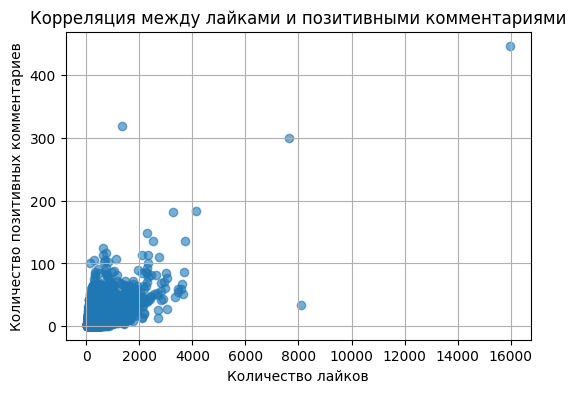

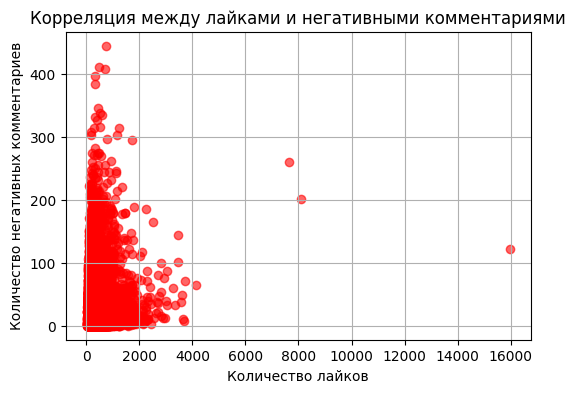

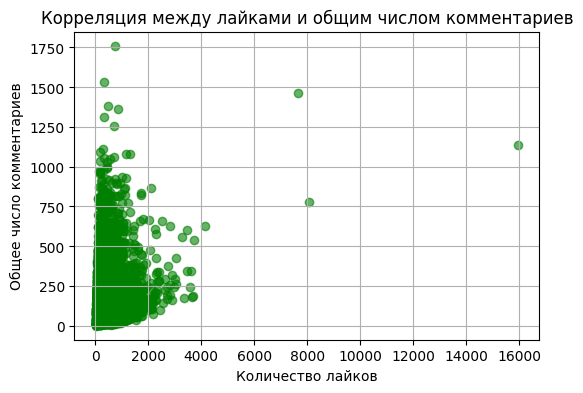

In [ ]:
import matplotlib.pyplot as plt

# Создаем график для корреляции likes и positive
plt.figure(figsize=(6, 4))
plt.scatter(df_vk_merged['likes'], df_vk_merged['positive'], alpha=0.6)
plt.title('Корреляция между лайками и позитивными комментариями')
plt.xlabel('Количество лайков')
plt.ylabel('Количество позитивных комментариев')
plt.grid(True)
plt.show()

# Создаем график для корреляции likes и negative
plt.figure(figsize=(6, 4))
plt.scatter(df_vk_merged['likes'], df_vk_merged['negative'], alpha=0.6, color='red')
plt.title('Корреляция между лайками и негативными комментариями')
plt.xlabel('Количество лайков')
plt.ylabel('Количество негативных комментариев')
plt.grid(True)
plt.show()

# Создаем график для корреляции likes и comments
plt.figure(figsize=(6, 4))
plt.scatter(df_vk_merged['likes'], df_vk_merged['comments'], alpha=0.6, color='green')
plt.title('Корреляция между лайками и общим числом комментариев')
plt.xlabel('Количество лайков')
plt.ylabel('Общее число комментариев')
plt.grid(True)
plt.show()

Как мы можем заметить, везде положительная  связь, но сильнее всего проявляется связь между количеством лайков и комментариев.

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [ ]:
# your code here
# ฅ^•ﻌ•^ฅ
def count_lower_bound(u, d):
    a = 1 + u
    b = 1 + d
    lower_bound = (a / (a + b)) - 1.65 * ((a * b / ((a + b) ** 2 * (a + b + 1))))**0.5
    return lower_bound



In [ ]:
df_vk_merged['lower_bound'] = df_vk_merged.apply(lambda x: count_lower_bound(x['positive'], x['negative']), axis=1)

sorted_df_vk = df_vk_merged.sort_values(by='lower_bound', ascending=False)
sorted_df_vk1 = sorted_df_vk[['id', 'href', 'title', 'likes', 'comments', 'negative', 'neutral', 'positive', 'lower_bound']]

sorted_df_vk1.head(10)

,id,href,title,likes,comments,negative,neutral,positive,lower_bound
1547,23613039,https://rsport.ria.ru/20190101/1548964679.html,Российские хоккеисты обыграли Канаду на молоде...,1235,94,1.0,46.0,42.0,0.905420
7572,22073093,/culture/20180824/1527142299.html,"Россиянин Иван Бессонов победил в конкурсе ""кл...",1882,119,3.0,44.0,59.0,0.887960
974,23758565,https://rsport.ria.ru/20190113/1549287440.html,Россиянки выиграли золото по биатлону в эстафе...,2138,142,4.0,60.0,64.0,0.878140
6508,22351029,https://rsport.ria.ru/rhythm_gym/20180916/1141...,Сборная России выиграла медальный зачет ЧМ по ...,1585,62,1.0,27.0,27.0,0.859411
12529,20591225,https://rsport.ria.ru/hockey/20180422/11358902...,"""Ак Барс"" стал трехкратным обладателем Кубка Г...",1292,78,3.0,26.0,42.0,0.848438
14750,19756217,https://rsport.ria.ru/winter2018_hockey/201802...,Форвард сборной России Никита Гусев стал лучши...,3690,189,9.0,76.0,87.0,0.847762
13930,20065831,https://rsport.ria.ru/winter2018_russia/201803...,Вопреки всему: россияне стали вторыми на Парал...,2429,96,4.0,36.0,48.0,0.842917
3763,23089554,https://rsport.ria.ru/figure_skating/20181116/...,Загитова установила мировой рекорд в короткой ...,1088,114,2.0,75.0,32.0,0.841695
11660,20886126,https://rsport.ria.ru/hockey2018_news/20180514...,Сборная России по хоккею обыграла словаков в м...,1675,81,2.0,45.0,31.0,0.837302
13900,20079917,/culture/20180318/1516689359.html,Актер Федор Добронравов попал в больницу,206,63,2.0,28.0,31.0,0.837302


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

[0.6 балла] Задание 14: Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

Ответ:

In [ ]:
# your code here
# ٩(⁎❛ᴗ❛⁎)۶
df_oob_2 = sorted_df_vk[sorted_df_vk.href.isin(test_hrefs)][['href', 'title', 'likes', 'comments', 'positive', 'negative', 'lower_bound']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'tags']]
df_oob_2 = df_oob_2.set_index('href').join(df_ria_oob.set_index('href')).reset_index()

df_oob_2

,href,title,likes,comments,positive,negative,lower_bound,tags
0,/20181226/1548712560.html,"Два брата из Омской области, спасшие людей из ...",1059,55,17.0,3.0,0.685484,"новый год—2019,москва,омская область,общество"
1,/20181220/1548338764.html,"Астрономы сфотографировали ""снежное озеро"" на ...",458,43,8.0,1.0,0.634470,"планеты,марс-экспресс,европейское космическое ..."
2,/20181209/1547676844.html,СМИ сообщили об экстренной госпитализации Льва...,117,75,21.0,6.0,0.629711,"москва,культура"
3,/20181218/1548167905.html,"Ингушей, спасших испанца на Колыме, наградят в...",440,127,19.0,6.0,0.604092,"ингушетия,магаданская область,общество"
4,/20181215/1548049868.html,"Умер артист из ""Кривого зеркала"" Обид Асомов",268,80,23.0,8.0,0.601248,культура
...,...,...,...,...,...,...,...,...
1128,/20181209/1547690404.html,В МВД прокомментировали присутствие Колокольце...,73,54,NaN,12.0,NaN,"единая россия,владимир колокольцев,мвд рф,поли..."
1129,/20181209/1547687940.html,Нарышкин обвинил Британию в уничтожении улик п...,200,60,NaN,18.0,NaN,"дело об отравлении скрипалей,россия,в мире"
1130,/20181207/1547492365.html,"МИА ""Россия сегодня"" 5 лет",149,13,3.0,NaN,NaN,"инфографика,внешний лонгрид"
1131,/20181207/1547566382.html,СМИ назвали имя нового постпреда США в ООН,47,23,NaN,2.0,NaN,"хизер науэрт,дональд трамп,в мире"


In [ ]:
df_oob_2['tags'] = df_oob_2['tags'].str.split(',')

df_tags = df_oob_2.explode('tags')
tag_sentiment = df_tags.groupby('tags')['lower_bound'].mean()
sorted_tags = tag_sentiment.sort_values(ascending=False)
top_positive_tags = sorted_tags.head(10)

print(top_positive_tags)

tags
европейское космическое агентство    0.634470
марс-экспресс                        0.634470
queen                                0.599738
самара                               0.560855
юри луйк                             0.555464
александр усик                       0.526967
внуково                              0.521826
александр розенбаум                  0.521608
горячий ключ                         0.511843
красная поляна                       0.511843
Name: lower_bound, dtype: float64


__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ